In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
from google.colab import files
files.upload()

Saving _SELECT_pagename_date_part_hour_datetime_AS_hour_ROUND_AVG_pagev_202504051206.csv to _SELECT_pagename_date_part_hour_datetime_AS_hour_ROUND_AVG_pagev_202504051206.csv


{'_SELECT_pagename_date_part_hour_datetime_AS_hour_ROUND_AVG_pagev_202504051206.csv': b'"pagename","hour","avg_pageviews"\nMail.ru,2.0,20.15\nMail.ru,12.0,128.47\nMail.ru,19.0,77.40\n\xd0\x92\xd0\x9a\xd0\xbe\xd0\xbd\xd1\x82\xd0\xb0\xd0\xba\xd1\x82\xd0\xb5,2.0,71.02\n\xd0\x92\xd0\x9a\xd0\xbe\xd0\xbd\xd1\x82\xd0\xb0\xd0\xba\xd1\x82\xd0\xb5,12.0,489.39\n\xd0\x92\xd0\x9a\xd0\xbe\xd0\xbd\xd1\x82\xd0\xb0\xd0\xba\xd1\x82\xd0\xb5,19.0,506.90\n\xd0\xaf\xd0\xbd\xd0\xb4\xd0\xb5\xd0\xba\xd1\x81,2.0,1257.65\n\xd0\xaf\xd0\xbd\xd0\xb4\xd0\xb5\xd0\xba\xd1\x81,12.0,1207.43\n\xd0\xaf\xd0\xbd\xd0\xb4\xd0\xb5\xd0\xba\xd1\x81,19.0,1023.30\n'}

In [25]:
data = pd.read_csv('_SELECT_pagename_date_part_hour_datetime_AS_hour_ROUND_AVG_pagev_202504051206.csv')

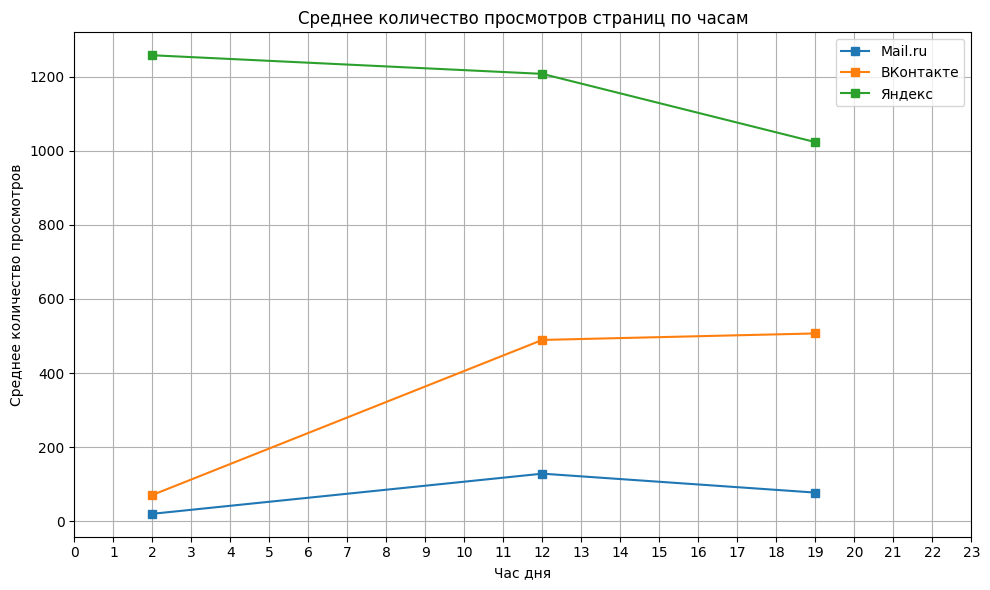

In [27]:
plt.figure(figsize=(10, 6))

#Группируем данные
for pagename in data['pagename'].unique():
    subset = data[data['pagename'] == pagename]
    plt.plot(subset['hour'], subset['avg_pageviews'], marker='s', label=pagename)

plt.title('Среднее количество просмотров страниц по часам')
plt.xlabel('Час дня')
plt.ylabel('Среднее количество просмотров')
plt.xticks(range(0, 24, 1))
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
# Корректировка часов из UTC+0 в UTC+3
data['hour_utc3'] = data['hour'] - 3
# Обработка случая, когда час становится отрицательным (переход через полночь)
data['hour_utc3'] = data['hour_utc3'].apply(lambda x: x + 24 if x < 0 else x)

# Сортировка данных по скорректированным часам для правильного порядка на графике
data = data.sort_values('hour_utc3')

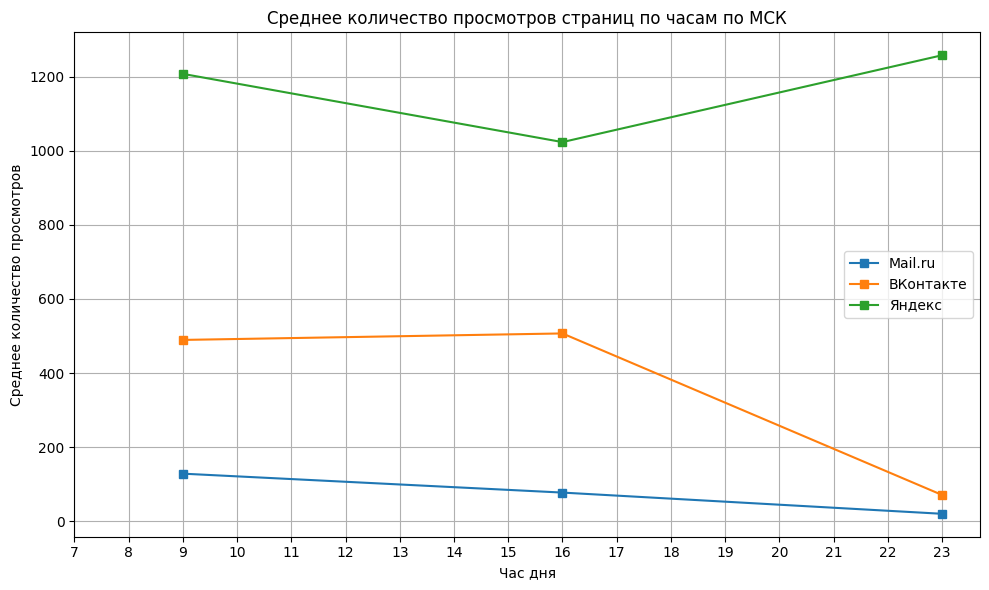

In [30]:
plt.figure(figsize=(10, 6))

#Группируем данные
for pagename in data['pagename'].unique():
    subset = data[data['pagename'] == pagename]
    plt.plot(subset['hour_utc3'], subset['avg_pageviews'], marker='s', label=pagename)

plt.title('Среднее количество просмотров страниц по часам по МСК')
plt.xlabel('Час дня')
plt.ylabel('Среднее количество просмотров')
plt.xticks(range(7, 24, 1))
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()